In [1]:
import sys
import os
import numpy as np
from osgeo import ogr 
from collections import deque
import matplotlib.pyplot as plt

from growingline import *


sys.path.append("/home/riannek/code/gleis/gleisachse")
from algs.gpkg import * 

ogr.UseExceptions()

In [2]:
ds = None

In [3]:
layer_name = "viele"

folder = "/media/riannek/minimax/gleis/"

ds = None 

import shutil 
file = shutil.copyfile(os.path.join(folder, "stage3vers.gpkg"), os.path.join(folder, "stage3tmp.gpkg"))

ds = ogr.Open(file, 1)

layers = []
for i in range(ds.GetLayerCount()):
    layer = ds.GetLayer(i)
    layers.append(layer.GetName())
layers.sort()
print(layers)

layer = ds.GetLayerByName(layer_name)

['TEMPLINELAYER', 'abseits', 'anfang weiche', 'kurve', 'viele', 'viele1', 'weiche']


In [4]:
# Add a temporary "skip" field if it doesn't exist
if layer.FindFieldIndex("skip", 1) == -1:
    field = ogr.FieldDefn("skip", ogr.OFTInteger)
    layer.CreateField(field)

In [5]:
def new_line_layer(ds, spatial_reference, logger):
    if layer_exists(ds, "centerlines"):
        delete_layer(ds, "centerlines", logger)
    layer = ds.CreateLayer("centerlines", spatial_reference, ogr.wkbLineString25D)
    return layer 


linelayer = new_line_layer(ds, layer.GetSpatialRef(), None)


In [6]:
first_fid = None
first_xyz = None 
first_direction = None

In [7]:
queue = deque()

In [8]:

layer.GetFeatureCount()

12549

## Schleife

In [9]:
while layer.GetFeatureCount() > 0:
    print("feature count:", layer.GetFeatureCount())
    
    layer.SetAttributeFilter("skip IS NULL")
    feature = layer.GetNextFeature()
    layer.SetAttributeFilter(None)
    if feature is None:
        break
    current_fid =  feature.GetFID()
    print("current fid:", current_fid)
    active_line = GrowingLine.from_feature(feature)

    while True:
        try:
            switch_lines = active_line.grow(layer, linelayer)
        except StartInSwitchError:
            print("#########")
            switch_lines = None

            # Skip this feature in the next iteration
            # if it has not been deleted by the growing line
            feature = layer.GetFeature(current_fid)
            if feature is not None:
                feature.SetField("skip", 1)
                layer.SetFeature(feature)
            break

        queue.extend(switch_lines)
        if len(queue) == 0:
            break
        active_line = queue.popleft()

    if switch_lines is not None:
        # Remove the starting point (if we did not start in a switch)
        remove_points([current_fid], layer)
    layer.ResetReading()

feature count: 12549
current fid: 2031
#########
feature count: 12549
current fid: 2032
#########
feature count: 12549
current fid: 2033
#########
feature count: 12549
current fid: 2034
#########
feature count: 12549
current fid: 2035
Adding new switch line
Making cut in switch
Length of switch line: 29.661380956816906 points: 1
Cut active line: False
Reversed head
Adding new switch line
Making cut in switch
Length of switch line: 26.70519978588935 points: 1
Cut active line: False
FINISHED
Adding new switch line
Making cut in switch
Length of switch line: 17.500789370556834 points: 1
Cut active line: True
Distance from head to switch line head: 2.3662141596713413
Going back: 27.867003530228175
Cut index: 22 distance 4.753233002246192 go_back 27.867003530228175
FINISHED
Adding new switch line
Making cut in switch
Length of switch line: 18.678052172215786 points: 1
Cut active line: True
Distance from head to switch line head: 0.6302628294204317
Going back: 27.308315001636217
Cut index: 2

In [10]:
ds = None

## STOP HERE

In [11]:
raise ValueError("Stop here")

ValueError: Stop here

In [ ]:
active_line.reverse_head()

True

In [ ]:
geom = active_line.get_linestring()
print(geom.Length())

if geom.Length() > 5:
    linelayer_add(linelayer, geom)


6.5373792594158795


In [ ]:
layer.SetAttributeFilter(None)
feature = layer.GetFeature(210352)
feature  

In [ ]:
print(len(active_line.switch))

0


In [ ]:
active_line.switch 

[]

In [ ]:
active_line.switch[2].points  

[array([4.47386367e+06, 5.33619907e+06, 5.16786670e+02]),
 array([4.47386389e+06, 5.33619810e+06, 5.16788972e+02]),
 array([4.47386408e+06, 5.33619719e+06, 5.16793189e+02]),
 array([4.47386424e+06, 5.33619647e+06, 5.16796515e+02]),
 array([4.47386439e+06, 5.33619578e+06, 5.16799393e+02]),
 array([4.47386459e+06, 5.33619489e+06, 5.16803550e+02])]

In [ ]:
queue.extend(active_line.switch)
print(len(queue))

1


In [ ]:
active_line = queue.popleft()

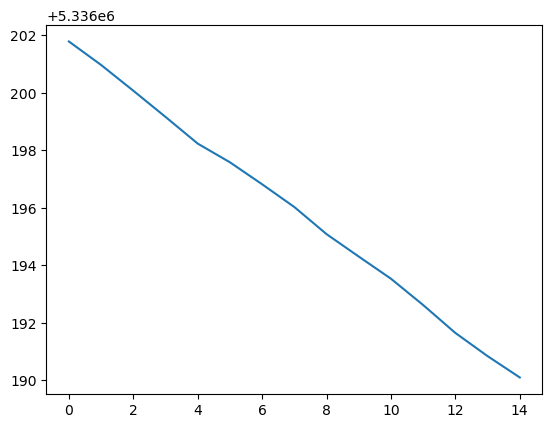

In [ ]:
foo = np.array(active_line.points)
foo = foo[:,1] 
x = np.arange(len(foo))
fig, ax = plt.subplots()
ax.plot(x, foo)

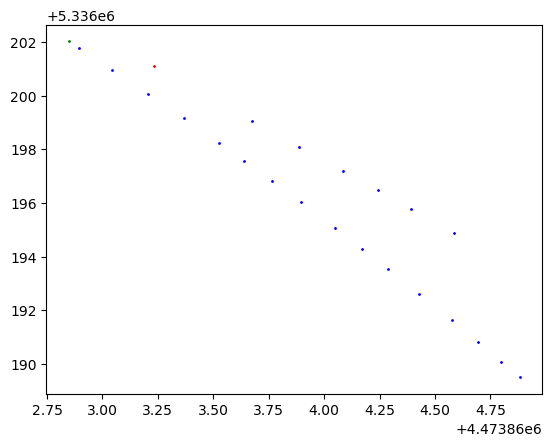

In [ ]:
fig, ax = plt.subplots()
foo = np.array(active_line.points)
x = foo[:,0]
y = foo[:,1]
ax.scatter(x, y, c='b', s=1)

foo = np.array(active_line.switch[0].points)  
x = foo[:,0]
y = foo[:,1]
ax.scatter(x, y, c='r', s=1)

foo = np.array(active_line.switch[1].points)  
x = foo[:,0]
y = foo[:,1]
ax.scatter(x, y, c='g', s=1)

foo = np.array(active_line.switch[2].points)  
x = foo[:,0]
y = foo[:,1]
ax.scatter(x, y, c='b', s=1)

TypeError: in method 'Layer_GetFeature', argument 1 of type 'OGRLayerShadow *'

TypeError: in method 'Layer_GetFeatureCount', argument 1 of type 'OGRLayerShadow *'